<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis
---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

<a id="pandas"></a>

## 1. What Is Pandas?

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:

* Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
* Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
* The total size of an `ndarray` is fixed.

Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### 1.1 Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. 

In standard Python, this would most likely give a syntax error.  

Pandas also highly favors certain patterns of use. 

For example, looping through a `DataFrame` row by row is highly discouraged. 

Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### 1.2 Class Methods and Attributes

The Pandas `DataFrame` is a Pandas class object, and therefore comes with a set of attributes (or properties) and methods that can be applied specifically to Pandas ``DataFrames``. 

To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable

- users.head()      # calls the `head` method (since there are open/closed parentheses)

- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:

- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

Let's try it out by reading in a CSV file and accessing some of its attributes (downloaded from here (Table 32): https://data.gov.uk/dataset/44864962-e4ad-46e6-8f10-71b40126cefb/higher-education-student-data):

We start by importing ``pandas`` and reading in a CSV file using the ``read_csv`` function. We've also imported ``matplotlib`` for plotting, which we'll do later.

We preview the first five rows of the ``DataFrame`` using the ``head`` method.

The ``header`` parameter specifies that the column names are in row ``16`` of the underlying CSV file. 

Notice that ``pandas`` picks out the column names, and numbers the rows.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

university_df = pd.read_csv('./data/Higher_Ed_by_Ethnicity.csv',header=16)
university_df.head(20)


,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305
5,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Not known,410
6,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Total,11700
7,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,White,1770
8,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Black,100
9,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Asian,545


Getting the ``index`` attribute shows us how many rows are in the dataframe

In [3]:
university_df.index

RangeIndex(start=0, stop=104195, step=1)

We can also quickly access the column names

In [4]:
university_df.columns

Index(['Subject of study marker', 'Subject of study', 'Level of qualification',
       'Mode of study', 'Academic Year', 'Ethnicity marker', 'Number'],
      dtype='object')

But the ``shape`` attribute is a better way of figuring out how big our dataset is.

In [5]:
university_df.shape

(104195, 7)

We can confirm that our ``DataFrame`` is the correct type

In [6]:
type(university_df)     

pandas.core.frame.DataFrame

We can check the types of individual columns

In [7]:
university_df.dtypes

Subject of study marker    object
Subject of study           object
Level of qualification     object
Mode of study              object
Academic Year              object
Ethnicity marker           object
Number                      int64
dtype: object

If needed, we could convert non-numeric types to numeric types using the ``to_numeric`` function. Note that the ``str.replace()`` function has been used to remove the commas in the ``Travel and Hotel Costs (Base Sales)`` column before it can be converted into a numeric type

In [8]:
university_df['Number'] = pd.to_numeric(university_df['Number'])


We can access all the values in the ``DataFrame`` as a Numpy array

In [9]:
university_df.values

array([['Subject area', '(1) Medicine & dentistry', 'All', ...,
        '2017/18', 'White', 7355],
       ['Subject area', '(1) Medicine & dentistry', 'All', ...,
        '2017/18', 'Black', 425],
       ['Subject area', '(1) Medicine & dentistry', 'All', ...,
        '2017/18', 'Asian', 2705],
       ...,
       ['Subject area', 'Total', 'All undergraduate', ..., '2014/15',
        'Other', 680],
       ['Subject area', 'Total', 'All undergraduate', ..., '2014/15',
        'Not known', 4300],
       ['Subject area', 'Total', 'All undergraduate', ..., '2014/15',
        'Total', 70705]], dtype=object)

In [11]:
university_df.dtypes

Subject of study marker    object
Subject of study           object
Level of qualification     object
Mode of study              object
Academic Year              object
Ethnicity marker           object
Number                      int64
dtype: object

## 1.3 Selecting and indexing data

Pandas DataFrames have structural similarities with Python-style lists and dictionaries.  

In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [14]:
university_df.columns
university_df[['Subject of study', 'Mode of study', 'Level of qualification']]

,Subject of study,Mode of study,Level of qualification
0,(1) Medicine & dentistry,Full-time,All
1,(1) Medicine & dentistry,Full-time,All
2,(1) Medicine & dentistry,Full-time,All
3,(1) Medicine & dentistry,Full-time,All
4,(1) Medicine & dentistry,Full-time,All
...,...,...,...
104190,Total,Part-time,All undergraduate
104191,Total,Part-time,All undergraduate
104192,Total,Part-time,All undergraduate
104193,Total,Part-time,All undergraduate


###  Making friendly columns

In [15]:
# it's easier to manipulate the columns in lower case and unders_core

pd_friendly_columns = [col_string.replace(' ', '_') for col_string in university_df.columns]

university_df.columns = pd_friendly_columns

university_df.columns = map(str.lower, university_df.columns)

In [16]:
university_df.head()

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


In [17]:
university_df['academic_year']

0         2017/18
1         2017/18
2         2017/18
3         2017/18
4         2017/18
           ...   
104190    2014/15
104191    2014/15
104192    2014/15
104193    2014/15
104194    2014/15
Name: academic_year, Length: 104195, dtype: object

The result is a Pandas series.

In [18]:
type(university_df['academic_year'])

pandas.core.series.Series

We can also select a single column using this syntax

In [19]:
university_df[['academic_year']]

,academic_year
0,2017/18
1,2017/18
2,2017/18
3,2017/18
4,2017/18
...,...
104190,2014/15
104191,2014/15
104192,2014/15
104193,2014/15


The result is a DataFrame

In [20]:
type(university_df[['academic_year']])

pandas.core.frame.DataFrame

We can select multiple columns using ``loc``.

In [21]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['academic_year', 'subject_of_study']     # Create a list of column names...
university_df[my_cols]                    # ...and use that list to select columns.

,academic_year,subject_of_study
0,2017/18,(1) Medicine & dentistry
1,2017/18,(1) Medicine & dentistry
2,2017/18,(1) Medicine & dentistry
3,2017/18,(1) Medicine & dentistry
4,2017/18,(1) Medicine & dentistry
...,...,...
104190,2014/15,Total
104191,2014/15,Total
104192,2014/15,Total
104193,2014/15,Total


In [22]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
university_df[['academic_year', 'subject_of_study'] ]

,academic_year,subject_of_study
0,2017/18,(1) Medicine & dentistry
1,2017/18,(1) Medicine & dentistry
2,2017/18,(1) Medicine & dentistry
3,2017/18,(1) Medicine & dentistry
4,2017/18,(1) Medicine & dentistry
...,...,...
104190,2014/15,Total
104191,2014/15,Total
104192,2014/15,Total
104193,2014/15,Total


In [23]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "Destination".
university_df.loc[:, 'academic_year']  

0         2017/18
1         2017/18
2         2017/18
3         2017/18
4         2017/18
           ...   
104190    2014/15
104191    2014/15
104192    2014/15
104193    2014/15
104194    2014/15
Name: academic_year, Length: 104195, dtype: object

In [24]:
# Select two columns.
university_df.loc[:, ['academic_year', 'subject_of_study']]

,academic_year,subject_of_study
0,2017/18,(1) Medicine & dentistry
1,2017/18,(1) Medicine & dentistry
2,2017/18,(1) Medicine & dentistry
3,2017/18,(1) Medicine & dentistry
4,2017/18,(1) Medicine & dentistry
...,...,...
104190,2014/15,Total
104191,2014/15,Total
104192,2014/15,Total
104193,2014/15,Total


In [25]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
university_df.loc[:, 'academic_year' : 'number']

,academic_year,ethnicity_marker,number
0,2017/18,White,7355
1,2017/18,Black,425
2,2017/18,Asian,2705
3,2017/18,Mixed,495
4,2017/18,Other,305
...,...,...,...
104190,2014/15,Asian,4845
104191,2014/15,Mixed,1470
104192,2014/15,Other,680
104193,2014/15,Not known,4300


In [26]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
university_df.loc[0, :]

subject_of_study_marker                Subject area
subject_of_study           (1) Medicine & dentistry
level_of_qualification                          All
mode_of_study                             Full-time
academic_year                               2017/18
ethnicity_marker                              White
number                                         7355
Name: 0, dtype: object

In [27]:
# Rows 0/1/2, all columns
university_df.loc[0:4, :]

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


In [28]:
# Rows 0/1/2, range of columns
university_df.loc[0:2, 'academic_year' : 'number'] 

,academic_year,ethnicity_marker,number
0,2017/18,White,7355
1,2017/18,Black,425
2,2017/18,Asian,2705


In [29]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3  
university_df.iloc[:, [0, 3]]

,subject_of_study_marker,mode_of_study
0,Subject area,Full-time
1,Subject area,Full-time
2,Subject area,Full-time
3,Subject area,Full-time
4,Subject area,Full-time
...,...,...
104190,Subject area,Part-time
104191,Subject area,Part-time
104192,Subject area,Part-time
104193,Subject area,Part-time


In [30]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
university_df.iloc[:, 0:4]

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study
0,Subject area,(1) Medicine & dentistry,All,Full-time
1,Subject area,(1) Medicine & dentistry,All,Full-time
2,Subject area,(1) Medicine & dentistry,All,Full-time
3,Subject area,(1) Medicine & dentistry,All,Full-time
4,Subject area,(1) Medicine & dentistry,All,Full-time
...,...,...,...,...
104190,Subject area,Total,All undergraduate,Part-time
104191,Subject area,Total,All undergraduate,Part-time
104192,Subject area,Total,All undergraduate,Part-time
104193,Subject area,Total,All undergraduate,Part-time


In [31]:
# Rows in position 0/1/2, all columns
university_df.iloc[0:3, :] 

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705


## 1.3 Summarising the data

Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding. The ``describe`` method gives summary statistics for the numeric columns in the data.

In [32]:
university_df.describe() 

,number
count,104195.000000
mean,1529.443399
std,14211.632245
min,0.000000
25%,0.000000
50%,15.000000
75%,150.000000
max,569185.000000


It's also possible to get summary statistics for all columns, including non-numeric ones.

In [33]:
university_df.describe(include='all')

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
count,104195,104195,104195,104195,104195,104195,104195.000000
unique,2,188,7,3,4,7,NaN
top,Principal subject,Total,All,All,2015/16,Black,NaN
freq,91315,1176,15680,35735,26117,14885,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1529.443399
std,NaN,NaN,NaN,NaN,NaN,NaN,14211.632245
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000


And to get summaries for individual columns.

In [34]:
university_df['academic_year'].describe()

count      104195
unique          4
top       2015/16
freq        26117
Name: academic_year, dtype: object

The ``value_counts`` method gives a count for each unique value in a DataFrame column.

In [35]:
university_df['subject_of_study'].value_counts()

Total                                                                       1176
(F) Languages                                                                588
(D3) Animal science                                                          588
(Q8) Classical studies                                                       588
(G3) Statistics                                                              588
                                                                            ... 
(D7) Agricultural sciences                                                   301
(K0) Broadly-based programmes within architecture, building & planning       294
(T8) Australasian studies                                                    287
(P0) Broadly-based programmes within mass communications & documentation     189
(A0) Broadly-based programmes within medicine & dentistry                     42
Name: subject_of_study, Length: 188, dtype: int64

And the ``hist`` method gives a visual representation of value counts

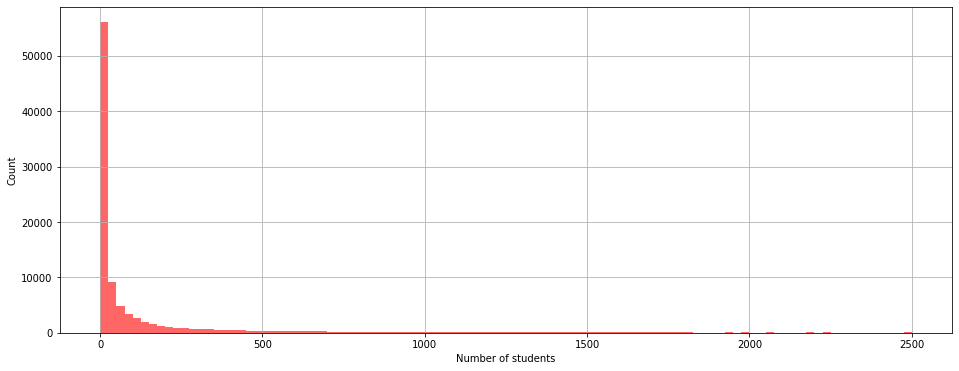

In [36]:
university_df['number'].hist(bins=100,range=[0, 2500],figsize=(16,6),color='red',alpha=0.6);
plt.xlabel('Number of students');
plt.ylabel('Count');


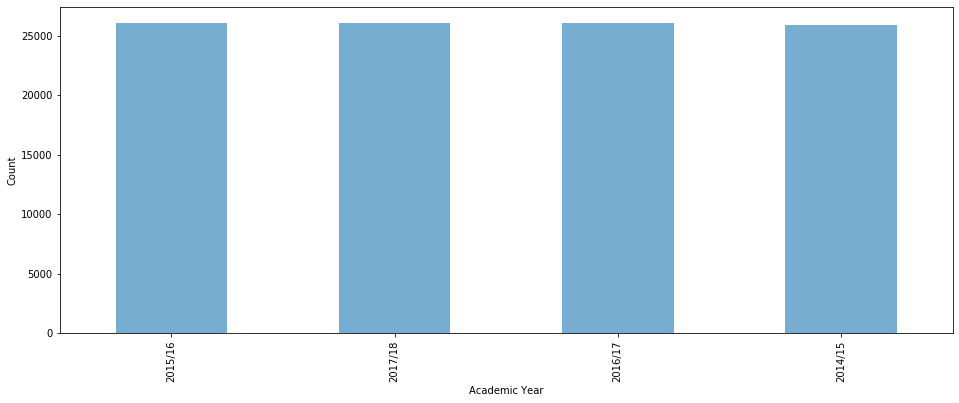

In [37]:
university_df['academic_year'].value_counts().plot(kind='bar',figsize=(16,6),alpha=0.6)  
plt.xlabel('Academic Year');
plt.ylabel('Count');


<a id="filtering-and-sorting"></a>
## Filtering and Sorting Data

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

In [38]:
university_df.head()

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


In [39]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.

number_filter = university_df['number'] > 3000
number_filter.head()

0     True
1    False
2    False
3    False
4    False
Name: number, dtype: bool

In [40]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.

university_df[number_filter].head()

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
6,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Total,11700
13,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Total,3175
14,Subject area,(1) Medicine & dentistry,All,All,2017/18,White,9130
16,Subject area,(1) Medicine & dentistry,All,All,2017/18,Asian,3250


We can also filter on strings

In [41]:
medicine_filter = university_df['subject_of_study'] == '(1) Medicine & dentistry'
medicine_df = university_df[medicine_filter]
medicine_df.head()

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


We can also use the ``str.contains()`` method to find all rows that contain a particular string. 

In [42]:
science_filter = university_df['subject_of_study'].str.contains('science')
science_df = university_df[science_filter]
science_df.head()

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
1176,Subject area,(3) Biological sciences,All,Full-time,2017/18,White,41175
1177,Subject area,(3) Biological sciences,All,Full-time,2017/18,Black,2725
1178,Subject area,(3) Biological sciences,All,Full-time,2017/18,Asian,4695
1179,Subject area,(3) Biological sciences,All,Full-time,2017/18,Mixed,2135
1180,Subject area,(3) Biological sciences,All,Full-time,2017/18,Other,580


And combine this into a single step

In [43]:
science_df = university_df[university_df['subject_of_study'].str.contains('science')]
science_df.head()

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
1176,Subject area,(3) Biological sciences,All,Full-time,2017/18,White,41175
1177,Subject area,(3) Biological sciences,All,Full-time,2017/18,Black,2725
1178,Subject area,(3) Biological sciences,All,Full-time,2017/18,Asian,4695
1179,Subject area,(3) Biological sciences,All,Full-time,2017/18,Mixed,2135
1180,Subject area,(3) Biological sciences,All,Full-time,2017/18,Other,580


We can combine multiple logical tests into a single filter

In [44]:
part_time_medicine_filter = (university_df['subject_of_study'] == 
                             
                             '(1) Medicine & dentistry') & (university_df['mode_of_study'] == 'Part-time')
    
    
part_time_medicine_df = university_df[part_time_medicine_filter]
part_time_medicine_df.head()


,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
7,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,White,1770
8,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Black,100
9,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Asian,545
10,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Mixed,90
11,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Other,75


This is a more efficient alternative to using lots of 'OR' statements.

In [45]:
university_df[university_df['subject_of_study'].isin(['(1) Medicine & dentistry', '(H1) General engineering'])]

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305
...,...,...,...,...,...,...,...
39482,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Asian,205
39483,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Mixed,50
39484,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Other,25
39485,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Not known,115


## Setting values in Dataframes

In [46]:
# Select one column from the filtered results. 'at method' to access specific column, with a label and renaming it.
#https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.DataFrame.at.html
university_df.at[2, 'subject_of_study'] = 'test_value'
university_df.head()


,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,test_value,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


## Sorting values

It's possible to sort the rows in a DataFrame by one column in ascending or descending order.

In [47]:
university_df.sort_values(by='number',ascending=True)

,subject_of_study_marker,subject_of_study,level_of_qualification,mode_of_study,academic_year,ethnicity_marker,number
19030,Principal subject,(B6) Aural & oral sciences,All undergraduate,All,2015/16,Other,0
101958,Principal subject,(Y0) Combined,Postgraduate (research),Full-time,2017/18,Mixed,0
101959,Principal subject,(Y0) Combined,Postgraduate (research),Full-time,2017/18,Other,0
101960,Principal subject,(Y0) Combined,Postgraduate (research),Full-time,2017/18,Not known,0
58972,Principal subject,(L4) Social policy,First degree,Part-time,2016/17,Other,0
...,...,...,...,...,...,...,...
103151,Principal subject,Total,All,All,2014/15,Total,544680
103067,Principal subject,Total,All,All,2016/17,Total,555475
103088,Subject area,Total,All,All,2016/17,Total,555475
103025,Principal subject,Total,All,All,2017/18,Total,569185


## Renaming, Adding, and Removing Columns

In [48]:
# Print the column labels
print(university_df.columns)

Index(['subject_of_study_marker', 'subject_of_study', 'level_of_qualification',
       'mode_of_study', 'academic_year', 'ethnicity_marker', 'number'],
      dtype='object')


In [49]:
# Rename one or more columns in a single output using value mapping.
university_df.rename(columns={'subject_of_study':'subject', 'academic_year':'the_blessed_year'})

,subject_of_study_marker,subject,level_of_qualification,mode_of_study,the_blessed_year,ethnicity_marker,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,test_value,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305
...,...,...,...,...,...,...,...
104190,Subject area,Total,All undergraduate,Part-time,2014/15,Asian,4845
104191,Subject area,Total,All undergraduate,Part-time,2014/15,Mixed,1470
104192,Subject area,Total,All undergraduate,Part-time,2014/15,Other,680
104193,Subject area,Total,All undergraduate,Part-time,2014/15,Not known,4300


In [50]:
university_df.columns

Index(['subject_of_study_marker', 'subject_of_study', 'level_of_qualification',
       'mode_of_study', 'academic_year', 'ethnicity_marker', 'number'],
      dtype='object')

**Why haven't the column names changed when we try to access them?**

In [51]:
# Rename one or more columns in the original DataFrame.
university_df.rename(columns={'subject_of_study':'subject', 'academic_year':'year'},inplace=True)


In [52]:
university_df.columns

Index(['subject_of_study_marker', 'subject', 'level_of_qualification',
       'mode_of_study', 'year', 'ethnicity_marker', 'number'],
      dtype='object')

In [53]:
new_col_names = ['subject_marker','subject','level','study_mode',
                 'blessed_year', 'ethnicity','number']

university_df.columns = new_col_names

university_df.head()


,subject_marker,subject,level,study_mode,blessed_year,ethnicity,number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,test_value,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


## Easy Column Operations

Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [54]:
# Add a new column as a function of existing columns.
university_df['number_thousands'] = university_df['number']/1000
university_df['subject'] = university_df['subject'].str.lower()

university_df.head()


,subject_marker,subject,level,study_mode,blessed_year,ethnicity,number,number_thousands
0,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,White,7355,7.355
1,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,Black,425,0.425
2,Subject area,test_value,All,Full-time,2017/18,Asian,2705,2.705
3,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,Mixed,495,0.495
4,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,Other,305,0.305


## Removing Columns

In [55]:
university_df.drop(columns=['subject_marker'],inplace=True)
university_df.head()

,subject,level,study_mode,blessed_year,ethnicity,number,number_thousands
0,(1) medicine & dentistry,All,Full-time,2017/18,White,7355,7.355
1,(1) medicine & dentistry,All,Full-time,2017/18,Black,425,0.425
2,test_value,All,Full-time,2017/18,Asian,2705,2.705
3,(1) medicine & dentistry,All,Full-time,2017/18,Mixed,495,0.495
4,(1) medicine & dentistry,All,Full-time,2017/18,Other,305,0.305


## Handling Missing Values

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

**For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

Let's read in another dataset ('Expenses Jan to Mar 19' data downloaded from here: https://data.gov.uk/dataset/091af8ee-95db-4336-9902-42ee998be323/senior-officials-expenses-travel-and-hospitality-in-dwp) to understand missing values.

You'll notice that a lot of cells contain ``NaN`` or 'not a number'.

In [56]:
dwp_expenses_df = pd.read_csv('./data/dwp-senior-officials-expenses-jan-mar-2019.csv',encoding='latin1')
dwp_expenses_df.head(50)


,"Name (Firstname, Surname)",Start date of trip (DD/MM/YYYY),Duration of Visit (Days),Destination,Purpose of trip,Mode of transport,Class of travel,Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
0,Peter Schofield,11/01/2019,1.0,Swindon,Site Events,Rail,Standard,NaN,NaN,£50.35,NaN
1,Peter Schofield,18/01/2019,1.0,Estree/Borehamwood/ Watford,Site Events,Rail,Standard,NaN,NaN,£16.30,NaN
2,Peter Schofield,24/01/2019,1.0,Stockport/Manchester,Site Events,Rail,Standard,NaN,NaN,£283.30,NaN
3,Peter Schofield,30/01/2019,1.0,Birmingham/Sheffield,Site Events,Rail,Standard,NaN,NaN,£190.90,NaN
4,Peter Schofield,20/03/2019,1.0,Blackpool,Site Events,Rail / Taxi,Standard,NaN,NaN,£186.10,NaN
5,Peter Schofield,28/03/2019,1.0,"Gabalfa, Cardiff",Site Events,Rail,Standard,NaN,NaN,£237.65,NaN
6,Peter Schofield,08/01/2019,1.0,London Euston,Site Events,Rail,Standard,NaN,NaN,£15.00,NaN
7,Peter Schofield,26/03/2019,2.0,London Euston,Site Events,Rail,Standard,NaN,NaN,£15.00,NaN
8,Neil Couling,22/01/2019,1.0,Kennington Park,Change Leaders Forum meeting,Tube,Standard,NaN,NaN,£13.10,NaN
9,Neil Couling,25/01/2019,1.0,Holborn,Speaking at Deputy Director D Base Camp for CS...,Tube,Standard,NaN,NaN,£13.10,NaN


If we check the type of one of these ``NaN`` elements, we'll see it's still 'float'.

In [57]:
dwp_expenses_df.iloc[0,7]

nan

In [58]:
type(dwp_expenses_df.iloc[0,7])

float

In [59]:
# Only show rows where the Accommodation/Meals column is not NaN
dwp_expenses_df[dwp_expenses_df['Accomodation/Meals'].notnull()].head()

,"Name (Firstname, Surname)",Start date of trip (DD/MM/YYYY),Duration of Visit (Days),Destination,Purpose of trip,Mode of transport,Class of travel,Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
11,Neil Couling,07/03/2019,1.0,Manchester,Meetings in Manchester Hub,Rail,Standard,£84.59,NaN,£91.60,NaN
12,Neil Couling,08/03/2019,1.0,Hartlepool,Visit Hartlepool JCP & BSC,Rail,Standard,£2.20,NaN,£219.10,NaN
13,Neil Couling,14/03/2019,2.0,Leeds,Visit teams in Leeds,Rail,Standard,£83.05,NaN,£354.05,NaN
19,Janice Hartley,26/02/2019,2.0,Leeds,"Fraud, Error and Debt Board, Universal Credit ...",Car,Standard,£99.00,NaN,£148.10,NaN
21,Janice Hartley,14/03/2019,2.0,Leeds,"Future Leaders Scheme review, team meeting",Car,Standard,£77.00,NaN,£144.10,NaN


In [60]:
# Missing values are usually excluded in calculations by default.
dwp_expenses_df['Accomodation/Meals'].value_counts()  

£5.00       41
s           11
£10.00       7
£90.60       7
£4.90        5
            ..
£101.25      1
£267.00      1
£67.60       1
£25.90       1
£109.60      1
Name: Accomodation/Meals, Length: 166, dtype: int64

In [61]:
# Includes missing values
dwp_expenses_df['Accomodation/Meals'].value_counts(dropna=False) 

NaN         209
£5.00        41
s            11
£10.00        7
£90.60        7
           ... 
£267.00       1
£67.60        1
£25.90        1
£134.50       1
£99.50        1
Name: Accomodation/Meals, Length: 167, dtype: int64

We can choose to drop rows containing ``NaN`` values, or fill in ``NaN`` values with a string, float or other element of our choice. 

Be careful when doing either of these things; you could end up unintentionally removing rows, or filling in values that don't make sense or aren't accurate.

In this case, it would be important to clarify whether a ``NaN`` value in a particular column means the amount is zero, or whether it means the amount is unknown.

In [62]:
dwp_expenses_df.dtypes

Name (Firstname, Surname)                                                  object
Start date of trip (DD/MM/YYYY)                                            object
Duration of Visit (Days)                                                  float64
Destination                                                                object
Purpose of trip                                                            object
Mode of transport                                                          object
Class of travel                                                            object
Accomodation/Meals                                                         object
Other (including hospitality given)                                        object
Total cost, including all visas, accommodation, travel, meals etc. (£)     object
Total Cost of Use of Official Secure Car                                   object
dtype: object

In [63]:
# Let's start by converting the numeric columns to numeric types, stripping away the £ sign before the conversion

dwp_expenses_df['Accomodation/Meals'] = pd.to_numeric(dwp_expenses_df['Accomodation/Meals'].str.replace('£',''),errors='coerce')
dwp_expenses_df['Total cost, including all visas, accommodation, travel, meals etc. (£)'] = pd.to_numeric(dwp_expenses_df['Total cost, including all visas, accommodation, travel, meals etc. (£)'].str.replace('£',''),errors='coerce')
dwp_expenses_df['Other (including hospitality given)'] = pd.to_numeric(dwp_expenses_df['Other (including hospitality given)'].str.replace('£',''),errors='coerce')
dwp_expenses_df['Total Cost of Use of Official Secure Car'] = pd.to_numeric(dwp_expenses_df['Total Cost of Use of Official Secure Car'].str.replace('£',''),errors='coerce')


In [64]:
# Drop a row if ANY values are missing from any column — can be dangerous!
#dwp_expenses_df.dropna()

# Drop a row only if ALL values are missing.
#dwp_expenses_df.dropna(how='all')

# Fill in missing values with 0 — this is dangerous to do without manually verifying them!
dwp_expenses_df['Accomodation/Meals'].fillna(value=0,inplace=True)
dwp_expenses_df['Total cost, including all visas, accommodation, travel, meals etc. (£)'].fillna(value=0,inplace=True)
dwp_expenses_df['Other (including hospitality given)'].fillna(value=0,inplace=True)
dwp_expenses_df['Total Cost of Use of Official Secure Car'].fillna(value=0,inplace=True)



In [84]:
dwp_expenses_df.head(10)

,"Name (Firstname, Surname)",Start date of trip (DD/MM/YYYY),Duration of Visit (Days),Destination,Purpose of trip,Mode of transport,Class of travel,Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
0,Peter Schofield,11/01/2019,1.0,Swindon,Site Events,Rail,Standard,0.0,0.0,50.35,0.0
1,Peter Schofield,18/01/2019,1.0,Estree/Borehamwood/ Watford,Site Events,Rail,Standard,0.0,0.0,16.30,0.0
2,Peter Schofield,24/01/2019,1.0,Stockport/Manchester,Site Events,Rail,Standard,0.0,0.0,283.30,0.0
3,Peter Schofield,30/01/2019,1.0,Birmingham/Sheffield,Site Events,Rail,Standard,0.0,0.0,190.90,0.0
4,Peter Schofield,20/03/2019,1.0,Blackpool,Site Events,Rail / Taxi,Standard,0.0,0.0,186.10,0.0
5,Peter Schofield,28/03/2019,1.0,"Gabalfa, Cardiff",Site Events,Rail,Standard,0.0,0.0,237.65,0.0
6,Peter Schofield,08/01/2019,1.0,London Euston,Site Events,Rail,Standard,0.0,0.0,15.00,0.0
7,Peter Schofield,26/03/2019,2.0,London Euston,Site Events,Rail,Standard,0.0,0.0,15.00,0.0
8,Neil Couling,22/01/2019,1.0,Kennington Park,Change Leaders Forum meeting,Tube,Standard,0.0,0.0,13.10,0.0
9,Neil Couling,25/01/2019,1.0,Holborn,Speaking at Deputy Director D Base Camp for CS...,Tube,Standard,0.0,0.0,13.10,0.0


## Understanding Pandas axes

In [65]:
# axis=0 sums across rows
dwp_expenses_df[['Accomodation/Meals', 'Other (including hospitality given)']].sum(axis=0)


Accomodation/Meals                     20632.84
Other (including hospitality given)     8253.72
dtype: float64

In [66]:
# axis=1 sums across columns (doesn't always lead to results that make sense)
dwp_expenses_df[['Accomodation/Meals', 'Other (including hospitality given)']].sum(axis=1)


0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
462    303.10
463    305.10
464    303.10
465    298.10
466    837.15
Length: 467, dtype: float64

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean travel costs per person. Then:

- **Split:** We group data by person.
- **Apply:** For each group, we apply the `sum()` function to find the mean travel cost.
- **Combine:** We now combine the names with the `sum()`s to produce a summary of our findings.

In [67]:
# For each official, calculate the mean trip duration.
dwp_expenses_df.groupby('Name (Firstname, Surname)')['Duration of Visit (Days)'].mean()

Name (Firstname, Surname)
Aaron Jaffery          1.363636
Alexksei  Doroshko     1.181818
Carol Morris           1.285714
Charlotte Clark        1.000000
Colin Stewart          1.153846
Craig Eblett           1.588235
Debbie Alder           1.666667
Denise Horsfall             NaN
Donna Ward             1.000000
Emma Haddad            1.333333
Francis, Paul          1.125000
Graeme Wallace         1.571429
Helen Pickles          1.416667
Helen Pickles          1.000000
Helen Roberts          2.000000
Helen Roberts          1.000000
Iain Walsh             1.000000
Ian Wright             2.571429
James Wolfe            1.000000
Jane Cunliffe          2.000000
Janice Hartley         1.375000
John Paul Marks        1.500000
Jonathan Mills         1.000000
Juan Villamil          1.500000
Julie Gillis                NaN
Karen Gosden           1.576923
Lara Sampson           1.000000
Lara Sampson           1.000000
Lorraine Jainudeen     1.333333
Margarita Morrison     1.000000
Mary Pattison 

In [68]:
# For each official, calculate the mean of all numeric columns.
dwp_expenses_df.groupby('Name (Firstname, Surname)').mean()

,Duration of Visit (Days),Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
"Name (Firstname, Surname)",,,,,
Aaron Jaffery,1.363636,39.363636,0.000000,217.829091,0.000000
Alexksei Doroshko,1.181818,6.693939,0.000000,55.606061,0.000000
Carol Morris,1.285714,25.057143,0.000000,110.457143,0.000000
Charlotte Clark,1.000000,0.000000,0.000000,3.941176,0.000000
Colin Stewart,1.153846,22.265385,135.000000,157.384615,0.000000
Craig Eblett,1.588235,68.760588,0.000000,335.626471,0.000000
Debbie Alder,1.666667,110.800000,0.000000,219.116667,0.000000
Denise Horsfall,NaN,0.000000,0.000000,0.000000,0.000000
Donna Ward,1.000000,0.000000,0.000000,121.083333,0.000000


In [69]:
# For each official, describe total costs.
dwp_expenses_df.groupby('Name (Firstname, Surname)')['Total cost, including all visas, accommodation, travel, meals etc. (£)'].describe()


,count,mean,std,min,25%,50%,75%,max
"Name (Firstname, Surname)",,,,,,,,
Aaron Jaffery,22.0,217.829091,169.784652,13.00,104.5800,159.185,333.7425,736.24
Alexksei Doroshko,33.0,55.606061,60.788326,0.00,5.0000,16.500,100.0000,203.40
Carol Morris,7.0,110.457143,88.685941,24.80,40.2500,67.100,175.6500,249.50
Charlotte Clark,17.0,3.941176,3.728280,1.50,2.4000,2.400,2.4000,12.30
Colin Stewart,26.0,157.384615,157.417057,13.05,41.3500,59.400,336.2500,508.60
Craig Eblett,17.0,335.626471,188.650706,56.00,179.0000,358.090,376.1000,697.66
Debbie Alder,3.0,219.116667,68.373173,140.75,195.3750,250.000,258.3000,266.60
Denise Horsfall,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
Donna Ward,3.0,121.083333,67.371328,51.50,88.6250,125.750,155.8750,186.00


In [70]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
dwp_expenses_df.groupby('Name (Firstname, Surname)').agg(['count', 'mean', 'min', 'max'])


Duration of Visit (Days)                      \
                                             count      mean  min  max   
Name (Firstname, Surname)                                                
Aaron Jaffery                                   22  1.363636  1.0  4.0   
Alexksei  Doroshko                              33  1.181818  1.0  3.0   
Carol Morris                                     7  1.285714  1.0  2.0   
Charlotte Clark                                 17  1.000000  1.0  1.0   
Colin Stewart                                   26  1.153846  1.0  2.0   
Craig Eblett                                    17  1.588235  1.0  3.0   
Debbie Alder                                     3  1.666667  1.0  2.0   
Denise Horsfall                                  0       NaN  NaN  NaN   
Donna Ward                                       3  1.000000  1.0  1.0   
Emma Haddad                                      3  1.333333  1.0  2.0   
Francis, Paul                                    8  1.125000  1.0  2.0   
Graeme Wallace                                   7  1.571429  1.0  2.0   
Helen Pickles                                   12  1.416667  1.0  2.0   
Helen Pickles                                    1  1.000000  1.0  1.0   
Helen Roberts                                    2  2.000000  2.0  2.0   
Helen Roberts                                   11  1.000000  1.0  1.0   
Iain Walsh                                       2  1.000000  1.0  1.0   
Ian Wright                                       7  2.571429  1.0  4.0   
James Wolfe                                      3  1.000000  1.0  1.0   
Jane Cunliffe                                    5  2.000000  1.0  3.0   
Janice Hartley                                   8  1.375000  1.0  2.0   
John Paul Marks                                  8  1.500000  1.0  2.0   
Jonathan Mills                                   6  1.000000  1.0  1.0   
Juan Villamil                                   12  1.500000  1.0  3.0   
Julie Gillis                                     0       NaN  NaN  NaN   
Karen Gosden                                    26  1.576923  1.0  4.0   
Lara Sampson                                     5  1.000000  1.0  1.0   
Lara Sampson                                     5  1.000000  1.0  1.0   
Lorraine Jainudeen                               3  1.333333  1.0  2.0   
Margarita Morrison                               4  1.000000  1.0  1.0   
Mary Pattison                                    2  1.500000  1.0  2.0   
Matt Briggs                                      6  1.500000  1.0  2.0   
Neil Couling                                     6  1.166667  1.0  2.0   
Nic Harrison                                     9  1.444444  1.0  2.0   
Nick Joicey                                      8  1.750000  1.0  2.0   
Paul Lodge                                      14  1.714286  1.0  5.0   
Pauline Crellin                                  3  1.000000  1.0  1.0   
Pete Searle                                     23  1.347826  1.0  3.0   
Peter Knight                                    11  1.909091  1.0  5.0   
Peter Schofield                                  8  1.125000  1.0  2.0   
Richard Cornish                                 25  2.880000  1.0  9.0   
Richard West                                    13  1.384615  1.0  3.0   
Stephen Buckingham                              19  1.263158  1.0  2.0   
Stuart Proud                                     8  1.625000  1.0  3.0   
Sue Moore                                        6  2.666667  1.0  5.0   
Susan Park                                      12  1.416667  1.0  2.0   
Tamara Bruck                                     3  1.333333  1.0  2.0   
Tara Smith                                      12  1.333333  1.0  2.0   
Tom McCormack                                    9  1.555556  1.0  3.0   

                          Accomodation/Meals                            \
                                       count        mean   min     max   
Name (Firstname, Surname)    

## Exercises

We'll be working with Twitter's election integrity dataset from October 2018, which consists of ~3million tweets from accounts suspected to be associated with overseas bot accounts.

Some of the code in these exercises is boilerplated (i.e. written for you), with gaps for you to fill in. Instructions are provided in the comments where this is the case.



## 1) Read in the data

Visit this URL, and enter your email address to access information about the datasets. Read a bit about which datasets are available: https://about.twitter.com/en_gb/values/elections-integrity.html#data

In particular, read the ``Readme`` file to understand the variables contained in each dataset: 



We'll be downloading the tweets associated with the **Iran (October 2018) – 770 accounts** dataset. 

To do this, you should:

* Click on this URL, and download the resulting ZIP file to your computer.



* Unzip the contents of the file to the ``data`` directory inside the same directory as this notebook. 

The result should be a file called ``iranian_tweets_csv_hashed.csv`` in location ``./data/`` relative to this notebook.


In [71]:
iran_tweets_df = pd.read_csv("./data/iranian_tweets_csv_hashed.csv")

Preview the first 10 rows of the dataset using ``head``. What does each row correspond to?

In [73]:
iran_tweets_df.head(20)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,533622371429543936,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5757-ce...,[574356455],NaN
1,527205814906654721,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/top-news/10080-an-inqu...,[438542436],NaN
2,545166827350134784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/political/10404-cia-pr...,"[823905, 256625456]",NaN
3,538045437316321280,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5796-to...,[919513172],NaN
4,530053681668841472,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,1.0,2.0,NaN,[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5723-...,[83864876],NaN
5,479670430911836160,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/top-nouvelles/5242-boko...,[94022742],NaN
6,526450009382719488,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://awdnews.com/top-news/10061-the-ba%E2%8...,[22942692],NaN
7,525593430731157504,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,1.0,0.0,NaN,[http://www.awdnews.com/top-news/10040-turkish...,[36579565],NaN
8,617751516947030016,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/politique/l%E2%80%99uni...,[1043467202],NaN
9,612565807911030784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/soci%C3%A9t%C3%A9/les-n...,[1938647370],NaN


## 2) Inspect the data

Look at the column names

In [74]:
iran_tweets_df.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

Get the shape of the dataframe.

In [75]:
iran_tweets_df.shape

(1122936, 31)

Use ``value_counts()`` to get summary counts for the language of the tweets and the location of the account.

In [76]:
iran_tweets_df["tweet_language"].value_counts(dropna=False)

fr     323801
en     276946
ar     154326
tr      92466
fa      92206
es      65244
und     42750
ru      40796
NaN      5629
ur       4578
ro       4471
ps       4306
hi       4264
in       2051
de       1507
fi       1004
pt        976
tl        605
cy        564
et        514
da        475
ht        443
uk        384
it        382
bs        276
bg        250
nl        195
ca        184
sv        151
vi        131
eu        128
sl        125
id        117
no        111
pl        107
cs         85
ja         67
hu         64
sk         42
ne         31
lv         30
lt         28
is         25
sd         17
sr         16
iw         15
hr         12
th         11
el         10
mr         10
ko          5
zh          5
Name: tweet_language, dtype: int64

In [77]:
iran_tweets_df["user_reported_location"].value_counts()

Nantes, France             265448
Brazil                     101956
İstanbul, Türkiye 🇹🇷        68808
Kingdom of Saudi Arabia     59591
Moscow                      34010
                            ...  
Ohio                            3
Portland, OR                    3
Ohio, USA                       3
Asia                            1
US                              1
Name: user_reported_location, Length: 200, dtype: int64

Use ``describe`` to get a summary of the numeric columns in the data.

In [78]:
iran_tweets_df.describe(include='all')

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
count,1.122936e+06,1122936,1122936,1122936,887669,995845,434954,1.122936e+06,1.122936e+06,1122936,...,32.000000,32.000000,1.121572e+06,1.121572e+06,1.121572e+06,1.121572e+06,885731,1115553,685556,387
unique,NaN,660,660,660,200,463,113,NaN,NaN,413,...,NaN,NaN,NaN,NaN,NaN,NaN,138302,345250,307080,341
top,NaN,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,https://t.co/ubbYlvdLEB,NaN,NaN,2011-05-15,...,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[853144291560042496],لا | نعم
freq,NaN,265448,265448,265448,265448,265448,74903,NaN,NaN,265448,...,NaN,NaN,NaN,NaN,NaN,NaN,557800,297043,20442,32
mean,7.472463e+17,NaN,NaN,NaN,NaN,NaN,NaN,5.748174e+03,2.969764e+03,NaN,...,35.379731,25.312853,4.197769e-02,1.463375e-01,1.353095e+00,7.387274e-01,NaN,NaN,NaN,NaN
std,1.908321e+17,NaN,NaN,NaN,NaN,NaN,NaN,6.751381e+03,4.954698e+03,NaN,...,2.127639,60.264537,8.071837e-01,1.817634e+00,1.744169e+01,6.413935e+00,NaN,NaN,NaN,NaN
min,1.909798e+16,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,...,26.533333,-118.593247,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,5.633084e+17,NaN,NaN,NaN,NaN,NaN,NaN,7.850000e+02,3.050000e+02,NaN,...,35.696100,50.880595,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
50%,7.593382e+17,NaN,NaN,NaN,NaN,NaN,NaN,2.612000e+03,1.450000e+03,NaN,...,35.696100,51.417811,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
75%,9.258133e+17,NaN,NaN,NaN,NaN,NaN,NaN,8.012000e+03,2.029000e+03,NaN,...,35.787558,51.423100,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


## 3) Filter out non-UK based accounts and unneccessary columns

Filter the data so that only tweets where ``user_reported_location`` is ``United Kingdom`` are included.

In [79]:
uk_tweet_df = iran_tweets_df[iran_tweets_df['user_reported_location']=='United Kingdom']

Let's confirm that the filter has worked by running this next cell of code

In [80]:
iran_tweets_df[iran_tweets_df['user_reported_location']=='United Kingdom']

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
664,408121571929108480,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[Canada],[http://whatsupic.com/news-politics-canada/138...,NaN,NaN
665,402848526897385472,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[Canadian],[http://whatsupic.com/economy-canada/138485664...,"[212743876, 14886375]",NaN
666,377045366295654400,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://whatsupic.com/m-usa/news-politics-usa/...,NaN,NaN
667,540392116573073408,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[Ferguson],[http://whatsupic.com/news-politics-usa/white-...,"[17393196, 9763482]",NaN
668,565071588375429121,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://whatsupic.com/news-politics-world/1423...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122849,974915747830009856,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[https://goo.gl/edFWQs],[cfb431d28838bc87b3473081cc5899cfede8252c20156...,NaN
1122850,754061850094870528,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,1.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/dessin-anim%C3%A9/urgen...,[334317348],NaN
1122851,630279749718274048,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,"[Trump, Republican]",[http://whatsupic.com/news-politics-usa/14391-...,NaN,NaN
1122852,856448172914356224,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://tinyurl.com/kecsdpf],[cfb431d28838bc87b3473081cc5899cfede8252c20156...,NaN


In [81]:
uk_tweet_df[['tweet_text']]


,tweet_text
664,cfb431d28838bc87b3473081cc5899cfede8252c201564...
665,cfb431d28838bc87b3473081cc5899cfede8252c201564...
666,cfb431d28838bc87b3473081cc5899cfede8252c201564...
667,@NYDailyNews @NYPDnews White House (Ab)Uses #F...
668,cfb431d28838bc87b3473081cc5899cfede8252c201564...
...,...
1122849,Ex-FBI deputy director was fired two days befo...
1122850,@karlcium_ Urgent:Erdogan accuse la France et ...
1122851,#Trump Trumps Them All In #Republican Debates ...
1122852,What Is 'White Supremacy'? A Brief History of ...


Keep only the following columns:

``tweetid,
follower_count,
user_screen_name,
following_count,
account_creation_date,
tweet_text,
tweet_time,
like_count,
retweet_count``


It's more efficient to do this by selecting columns using ``my_df[['col1','col2','col3']]`` notation rather than using ``my_df.drop(columns=[])`` since we want to drop many more columns than we want to keep.


In [82]:
my_uk_tweet_df = uk_tweet_df[['tweetid', 'follower_count', 'user_screen_name', 'following_count', 'account_creation_date', 'tweet_text', 'tweet_time', 'like_count', 'retweet_count']]
my_uk_tweet_df.head()

,tweetid,follower_count,user_screen_name,following_count,account_creation_date,tweet_text,tweet_time,like_count,retweet_count
664,408121571929108480,2364,cfb431d28838bc87b3473081cc5899cfede8252c201564...,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2013-12-04 06:32,0.0,0.0
665,402848526897385472,2364,cfb431d28838bc87b3473081cc5899cfede8252c201564...,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2013-11-19 17:19,0.0,0.0
666,377045366295654400,2364,cfb431d28838bc87b3473081cc5899cfede8252c201564...,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2013-09-09 12:26,0.0,0.0
667,540392116573073408,2364,cfb431d28838bc87b3473081cc5899cfede8252c201564...,1160,2013-05-20,@NYDailyNews @NYPDnews White House (Ab)Uses #F...,2014-12-04 06:28,0.0,0.0
668,565071588375429121,2364,cfb431d28838bc87b3473081cc5899cfede8252c201564...,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2015-02-10 08:55,0.0,0.0


## 4) Which account was purportedly tweeting from the UK?

Use ``value_counts()`` on the ``user_screen_name`` column to see how many accounts were claiming to tweet from the United Kingdom.

In [83]:
my_uk_tweet_df['user_screen_name'].value_counts()

cfb431d28838bc87b3473081cc5899cfede8252c2015644ffeccd7b27b1149fb    28320
Name: user_screen_name, dtype: int64

In [91]:
#Another Dataframe of selected columns
my_iran_tweet_df = iran_tweets_df[['tweetid', 'follower_count', 'user_screen_name', 'following_count', 'account_creation_date', 'tweet_text', 'tweet_time', 'like_count', 'retweet_count']]
my_iran_tweet_df.head(50)

,tweetid,follower_count,user_screen_name,following_count,account_creation_date,tweet_text,tweet_time,like_count,retweet_count
0,533622371429543936,8012,marialuis91,1450,2011-05-15,@bellisarobz Ces photos illustrent parfaitemen...,2014-11-15 14:07,0.0,0.0
1,527205814906654721,8012,marialuis91,1450,2011-05-15,@ParkerLampe An inquiry by congress confirms t...,2014-10-28 21:10,0.0,0.0
2,545166827350134784,8012,marialuis91,1450,2011-05-15,@hadeelhmaidi @wordpressdotcom CIA predict thi...,2014-12-17 10:41,0.0,0.0
3,538045437316321280,8012,marialuis91,1450,2011-05-15,@MartinYannis l'avis bizarre de marcel tonton ...,2014-11-27 19:03,0.0,0.0
4,530053681668841472,8012,marialuis91,1450,2011-05-15,@courrierinter Les laboratoires US de guerre b...,2014-11-05 17:47,1.0,2.0
5,479670430911836160,8012,marialuis91,1450,2011-05-15,"@irfhabib why boko haram come europe,legally a...",2014-06-19 17:01,0.0,0.0
6,526450009382719488,8012,marialuis91,1450,2011-05-15,"@KhushbuCNN ISIS militants,plan to target West...",2014-10-26 19:07,0.0,0.0
7,525593430731157504,8012,marialuis91,1450,2011-05-15,@placesbrands Turkish intelligence chief: ISIS...,2014-10-24 10:23,1.0,0.0
8,617751516947030016,8012,marialuis91,1450,2011-05-15,@fentychuck L’Union Européenne déclare la guer...,2015-07-05 17:46,0.0,0.0
9,612565807911030784,8012,marialuis91,1450,2011-05-15,@PringlesNico pourquoi Les nouveaux pères ne s...,2015-06-21 10:20,0.0,0.0


It's just one user! Let's look at when they tweet, and what they tweet about.

In [86]:
#Another way from above - create Dataframe from original, same results
uk_users_df = iran_tweets_df[iran_tweets_df['user_reported_location']=='United Kingdom']
uk_users_df['user_screen_name'].value_counts()

cfb431d28838bc87b3473081cc5899cfede8252c2015644ffeccd7b27b1149fb    28320
Name: user_screen_name, dtype: int64

In [89]:
#Why couldn't I get .loc to work???

uk_users_df.iloc[28319:28321, :]

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
1122853,928302536758562817,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,cfb431d28838bc87b3473081cc5899cfede8252c201564...,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://tinyurl.com/y839n4uq],[cfb431d28838bc87b3473081cc5899cfede8252c20156...,NaN


## 5) Convert columns to the pandas ``datetime`` type

Use the ``pd.to_datetime()`` function to convert the ``account_creation_date`` and ``tweet_time`` columns into the type ``datetime``. This is a type in ``pandas`` that allows dates to be treated like timestamps, so we can search by date, sort in chronological order etc.

In [109]:
#my_iran_tweet_df.dtypes
#my_iran_tweet_df[my_iran_tweet_df['account_creation_date'].isna()]
#my_iran_tweet_df[ my_iran_tweet_df['tweet_time'].isna()]
my_iran_tweet_df['account_creation_date'] = pd.to_datetime(my_iran_tweet_df['account_creation_date'], errors='coerce')
my_iran_tweet_df['tweet_time'] = pd.to_datetime(my_iran_tweet_df['tweet_time'], errors='coerce')

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Use ``dtypes`` to confirm that these columns are now ``datetime`` columns.

In [112]:
my_iran_tweet_df.dtypes

tweetid                           int64
follower_count                    int64
user_screen_name                 object
following_count                   int64
account_creation_date    datetime64[ns]
tweet_text                       object
tweet_time               datetime64[ns]
like_count                      float64
retweet_count                   float64
dtype: object

In [113]:
#How to isolate occurrence(s) of invalid values in my datetime columns

# Drop a row if ANY values are missing from column
my_iran_tweet_df['tweet_time'].dropna()

# Drop a row only if ALL values are missing.
#my_iran_tweet_df['tweet_time'].dropna(how='all')

# Fill in missing values with 0 — this is dangerous to do without manually verifying them!
#my_iran_tweet_df['account_creation_date'].fillna(value=0,inplace=True)
#my_iran_tweet_df['tweet_time'].fillna(value=0,inplace=True)

0         2014-11-15 14:07:00
1         2014-10-28 21:10:00
2         2014-12-17 10:41:00
3         2014-11-27 19:03:00
4         2014-11-05 17:47:00
                  ...        
1122931   2018-06-08 23:57:00
1122932   2018-04-22 13:36:00
1122933   2017-11-22 23:12:00
1122934   2018-06-22 12:29:00
1122935   2018-06-21 13:52:00
Name: tweet_time, Length: 1122936, dtype: datetime64[ns]

## 6) When was this account tweeting?

Use the ``hist()`` method to get a quick visualisation of the distribution of ``tweet_time``s

In [114]:
#Matplotlib doesn't like datetime64??? Or NaT values need to be dropped
my_iran_tweet_df['tweet_time'].hist(bins=100, range=[0, 2500], figsize=(16, 6), color='red', alpha=0.6)
plt.xlabel('tweet_time');
plt.ylabel('numbers');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024A57E87EE8> (for post_execute):


ValueError: view limit minimum -125.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -125.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

## 7) Did the account get many likes or retweets?

Use ``value_counts()`` and ``describe()`` on the ``like_count`` and ``retweet_count`` columns to gauge how successful you think this account was at propagating information.

In [107]:
#Shows that the UK user account got below-average responses

#my_iran_tweet_df['like_count'].value_counts()
my_iran_tweet_df['like_count'].describe()
#my_iran_tweet_df['retweet_count'].value_counts()
#my_iran_tweet_df['retweet_count'].describe()

count    1.121572e+06
mean     1.353095e+00
std      1.744169e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.075000e+03
Name: like_count, dtype: float64

## 8) What was this account tweeting about?

We can start to explore the contents of each tweet using some basic word count methods. This is much less advanced than the more involved natural language processing methods we'll be using later on in the course, but is a good start. 

Let's begin by using the ``str.lower()`` method to convert the ``tweet_text`` column to lowercase so we don't have to worry about case sensitivity, and also using ``str.replace()`` together with a **regular expression** to catch **all puncuation marks** and replace them with an empty string; this is the same thing as stripping out all punctuation.

In [115]:
my_iran_tweet_df['tweet_text'] = my_iran_tweet_df['tweet_text'].str.lower().str.replace('[^\w\s]','')

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We can confirm the replacement has worked!

In [116]:
my_iran_tweet_df['tweet_text']

0          bellisarobz ces photos illustrent parfaitement...
1          parkerlampe an inquiry by congress confirms th...
2          hadeelhmaidi wordpressdotcom cia predict third...
3          martinyannis lavis bizarre de marcel tonton su...
4          courrierinter les laboratoires us de guerre bi...
                                 ...                        
1122931    rt alsaudiatimes صحيفة ايكونوميست  النموذج الإ...
1122932    rt alkawthartv جريمة قتل بشعة في السعودية أب ي...
1122933    rt alsaudiatimes الكاتب محمد مختار الشنقيطي عب...
1122934    المصدر العسكري  ضربات الجيش واللجان الشعبية اس...
1122935    المسيرة_عاجل  ناطق أنصار الله حملة العدو الإعل...
Name: tweet_text, Length: 1122936, dtype: object

Now use filtering and ``.str.contains()`` to find out what **percentage** of the tweets mention the following terms (remember we've converted everything to lowercase so your search terms need to be lowercase as well):

* obama
* brexit
* trump
* syria
* iran
* uk 
* russia

In [120]:
my_iran_tweet_df['tweet_text'] = my_iran_tweet_df['tweet_text'].str.contains('obama|brexit|trump|syria|iran|uk|russia', regex=True)
#my_iran_tweet_df['tweet_text']

AttributeError: Can only use .str accessor with string values!

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)